In [99]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense, Dropout
from keras import optimizers
from keras.optimizers import Adam

In [29]:
#variables and paths
IMAGE_PATH="../../data/processed/images.pkl"
EMOTION_PATH="../../data/processed/emotion.pkl"
EMOTION_DICT={
    0:'Angry',
    1:'Disgust',
    2:'Fear',
    3:'Happy',
    4:'Sad',
    5:'Surprise',
    6:'Neutral'
}
NO_OF_CLASSES=7
EPOCHS=7
BATCH_SIZE=64


In [30]:
image=pd.read_pickle(IMAGE_PATH)
emotion=pd.read_pickle(EMOTION_PATH)

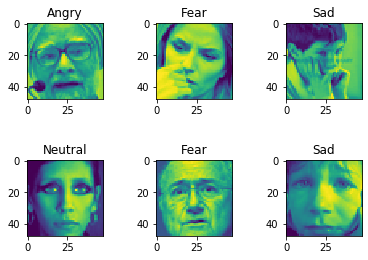

In [31]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.7)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.imshow(image['pixels'].iloc[i].reshape(48,48))
    plt.title(EMOTION_DICT[emotion['emotion'][i]])
   
    

In [32]:
X=np.zeros(shape=(len(image),48,48,1))
Y=np.zeros(shape=(len(image)),dtype=int)


In [33]:
for i in range(len(image)):
    X[i]=image['pixels'].iloc[i]
    Y[i]=emotion['emotion'].iloc[i]

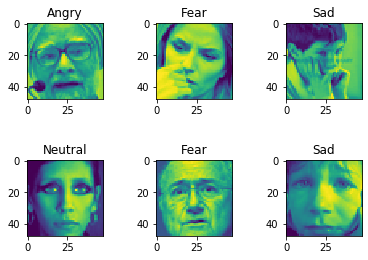

In [34]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.7)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.imshow(X[i].reshape(48,48))
    plt.title(EMOTION_DICT[Y[i]])
   

In [35]:
#encoding y
Y=to_categorical(Y, num_classes=7)
#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
#converting x
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255

In [106]:
#create the model
model = Sequential()

#1st convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
 
#2rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

#2rd convolution layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())
 
#fully connected neural networks
model.add(Dense(512, activation='relu'))
 
model.add(Dense(NO_OF_CLASSES, activation='softmax'))
#sgd = optimizers.SGD(lr=0.07)
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 19, 19, 128)       73856     
_________________________________________________________________
average_pooling2d_70 (Averag (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 7, 7, 256)         295168    
_________________________________________________________________
average_pooling2d_71 (Averag (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_43 (Flatten)         (None, 2304)              0         
__________

In [109]:
#train the model
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE,verbose=1)

Train on 26915 samples, validate on 8972 samples
Epoch 1/7
26915/26915 [==============================] - 151s 6ms/step - loss: 0.2834 - acc: 0.9030 - val_loss: 1.7206 - val_acc: 0.5936
Epoch 2/7
26915/26915 [==============================] - 152s 6ms/step - loss: 0.2583 - acc: 0.9118 - val_loss: 1.8560 - val_acc: 0.5888
Epoch 3/7
26915/26915 [==============================] - 152s 6ms/step - loss: 0.2303 - acc: 0.9209 - val_loss: 1.9234 - val_acc: 0.5848
Epoch 4/7
26915/26915 [==============================] - 156s 6ms/step - loss: 0.2051 - acc: 0.9324 - val_loss: 2.0951 - val_acc: 0.5801
Epoch 5/7
26915/26915 [==============================] - 155s 6ms/step - loss: 0.1814 - acc: 0.9393 - val_loss: 2.1866 - val_acc: 0.5868
Epoch 6/7
26915/26915 [==============================] - 160s 6ms/step - loss: 0.1673 - acc: 0.9447 - val_loss: 2.2287 - val_acc: 0.5883
Epoch 7/7
26915/26915 [==============================] - 159s 6ms/step - loss: 0.1578 - acc: 0.9480 - val_loss: 2.3308 - val_acc:

In [110]:
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 2.3308291006874837
Test accuracy: 0.583816317405437


In [112]:
model.save('../../emotion_model.h5py')
print('model saved')

model saved
